# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read first dataset
df_pizza = pd.read_csv("Task3/pizza_sales/pizzas.csv")
print(df_pizza.shape)
df_pizza.head(5)

(96, 4)


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [3]:
#Check dataset datatypes and also check for irregularities
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [4]:
df_pizza.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

df_pizza looks okay with no null value and no discrepancies in dtypes

In [5]:
df_pizza['size'].value_counts()

S      32
M      31
L      31
XL      1
XXL     1
Name: size, dtype: int64

In [6]:
df_pizza['pizza_id'].nunique()

96

The pizza on the menu has 5 sizes with various types

In [7]:
#read second dataset
df_type = pd.read_csv("Task3/pizza_sales/pizza_types.csv")
print(df_type.shape)
df_type.head(5)

(32, 4)


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [8]:
#Check for info
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [9]:
#merge pizza data using left join
pizza_df = pd.merge(df_pizza, df_type, on ='pizza_type_id',how='left')
pizza_df.shape

(96, 7)

In [10]:
pizza_df['pizza_id'].nunique()

96

In [11]:
pizza_df.head(5)

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [12]:
#read in order dataset
df_order = pd.read_csv(r"C:\Users\Hp\Desktop\Tech Crush\Task3\pizza_sales\orders.csv")
print(df_order.shape)
df_order.head(5)

(21350, 3)


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [13]:
#Check for info
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


from our df_order the date and time column are not in the right dtype, so i would create a new column to merge the date and time, then convert the column to a datetime object

In [14]:
#create new datetime column 
df_order['datetime'] = pd.to_datetime(df_order['date'].astype(str) + ' ' + df_order['time'].astype(str))
df_order

,order_id,date,time,datetime
0,1,2015-01-01,11:38:36,2015-01-01 11:38:36
1,2,2015-01-01,11:57:40,2015-01-01 11:57:40
2,3,2015-01-01,12:12:28,2015-01-01 12:12:28
3,4,2015-01-01,12:16:31,2015-01-01 12:16:31
4,5,2015-01-01,12:21:30,2015-01-01 12:21:30
...,...,...,...,...
21345,21346,2015-12-31,20:51:07,2015-12-31 20:51:07
21346,21347,2015-12-31,21:14:37,2015-12-31 21:14:37
21347,21348,2015-12-31,21:23:10,2015-12-31 21:23:10
21348,21349,2015-12-31,22:09:54,2015-12-31 22:09:54


In [15]:
#Extract datetime attributes from datetime column
df_order['month'] = df_order['datetime'].dt.month_name()
df_order['Day'] = df_order['datetime'].dt.day_name()
df_order['hour'] = df_order['datetime'].dt.hour

In [16]:
print(df_order.shape)
df_order.info()


(21350, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  object        
 2   time      21350 non-null  object        
 3   datetime  21350 non-null  datetime64[ns]
 4   month     21350 non-null  object        
 5   Day       21350 non-null  object        
 6   hour      21350 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 1.1+ MB


In [17]:
#read in order details dataset
df_order_det = pd.read_csv(r"C:\Users\Hp\Desktop\Tech Crush\Task3\pizza_sales\order_details.csv")
print(df_order_det.shape)
df_order_det.head(5)


(48620, 4)


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [18]:
df_order_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [19]:
df_order['order_id'].nunique()


21350

In [20]:
df_order_det['order_id'].nunique()

21350

order_id is the unique identifier for each customers

In [21]:
order_df = pd.merge(df_order,df_order_det,on ='order_id',how='left')
print(order_df.shape)
order_df.head(5)

(48620, 10)


,order_id,date,time,datetime,month,Day,hour,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,mexicana_m,1


In [22]:
print(order_df.shape)
print(df_order_det.shape)

(48620, 10)
(48620, 4)


In [23]:
order_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  object        
 2   time              48620 non-null  object        
 3   datetime          48620 non-null  datetime64[ns]
 4   month             48620 non-null  object        
 5   Day               48620 non-null  object        
 6   hour              48620 non-null  int64         
 7   order_details_id  48620 non-null  int64         
 8   pizza_id          48620 non-null  object        
 9   quantity          48620 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 4.1+ MB


In [24]:
#perform the final merge on all dataset to a dataframe using the right join
df = pizza_df.merge(order_df, on='pizza_id', how='right')
print(df.shape)
df.head()

(48620, 16)


,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1


If the join were driven by pizza_df on a left join, pizzas that were never sold would appear in the dataset, Therefore distorting the dataset.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_id          48620 non-null  object        
 1   pizza_type_id     48620 non-null  object        
 2   size              48620 non-null  object        
 3   price             48620 non-null  float64       
 4   name              48620 non-null  object        
 5   category          48620 non-null  object        
 6   ingredients       48620 non-null  object        
 7   order_id          48620 non-null  int64         
 8   date              48620 non-null  object        
 9   time              48620 non-null  object        
 10  datetime          48620 non-null  datetime64[ns]
 11  month             48620 non-null  object        
 12  Day               48620 non-null  object        
 13  hour              48620 non-null  int64         
 14  order_details_id  4862

## Feature Engineering

Create a column that will store the total sales/revenue

In [26]:
df['sales'] = df['price'] * df['quantity']
df['sales']

0        13.25
1        16.00
2        18.50
3        20.75
4        16.00
         ...  
48615    16.75
48616    17.95
48617    12.00
48618    20.25
48619    12.75
Name: sales, Length: 48620, dtype: float64

In [27]:
print(df.shape)
df.head(10)

(48620, 17)


,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00
5,thai_ckn_l,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,6,1,20.75
6,ital_supr_m,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",3,2015-01-01,12:12:28,2015-01-01 12:12:28,January,Thursday,12,7,1,16.50
7,prsc_argla_l,prsc_argla,L,20.75,The Prosciutto and Arugula Pizza,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella...",3,2015-01-01,12:12:28,2015-01-01 12:12:28,January,Thursday,12,8,1,20.75
8,ital_supr_m,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",4,2015-01-01,12:16:31,2015-01-01 12:16:31,January,Thursday,12,9,1,16.50
9,ital_supr_m,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",5,2015-01-01,12:21:30,2015-01-01 12:21:30,January,Thursday,12,10,1,16.50


Create a day category based on weekday and weekend

In [28]:
#create a list of working days
workdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
#Categorize day using the lambda function
df['day_category'] = df['Day'].apply(lambda x: 'Weekday' if x in workdays else 'Weekend')
df['day_category']

0        Weekday
1        Weekday
2        Weekday
3        Weekday
4        Weekday
          ...   
48615    Weekday
48616    Weekday
48617    Weekday
48618    Weekday
48619    Weekday
Name: day_category, Length: 48620, dtype: object

In [29]:
print(df.shape)
df.head()

(48620, 18)


,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25,Weekday
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00,Weekday
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50,Weekday
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75,Weekday
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00,Weekday


Create a time category based on time session using a function

In [30]:
def time_category(hour):
    if hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 16:
        return 'Afternoon'
    elif hour >= 16 and hour < 20:
        return 'Evening'
    else:
        return 'Night'




In [31]:
#Create new column for time session
df['session'] = df['datetime'].dt.hour.apply(time_category)
print(df.shape)
df.head()

(48620, 19)


,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category,session
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25,Weekday,Morning
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00,Weekday,Morning
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50,Weekday,Morning
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75,Weekday,Morning
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00,Weekday,Morning


In [32]:
df[df['hour'] < 15]

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category,session
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25,Weekday,Morning
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00,Weekday,Morning
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50,Weekday,Morning
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75,Weekday,Morning
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00,Weekday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,napolitana_l,napolitana,L,20.50,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",21294,2015-12-31,14:43:46,2015-12-31 14:43:46,December,Thursday,14,48487,1,20.50,Weekday,Afternoon
48487,classic_dlx_l,classic_dlx,L,20.50,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",21295,2015-12-31,14:52:25,2015-12-31 14:52:25,December,Thursday,14,48488,1,20.50,Weekday,Afternoon
48488,ital_cpcllo_m,ital_cpcllo,M,16.00,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",21295,2015-12-31,14:52:25,2015-12-31 14:52:25,December,Thursday,14,48489,1,16.00,Weekday,Afternoon
48489,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",21295,2015-12-31,14:52:25,2015-12-31 14:52:25,December,Thursday,14,48490,1,16.00,Weekday,Afternoon


# Exploratory Data Analysis

### Demand and Product Performance

###### Which Pizza types and sizes drive the highest demand?

How many pizza type is on the menu?

In [33]:
df['name'].nunique()

32

In [34]:
most_demanded_pizza=df.groupby(['name','size'])['quantity'].sum().sort_values(ascending=False).reset_index(name='Demand')

most_demanded_pizza

,name,size,Demand
0,The Big Meat Pizza,S,1914
1,The Thai Chicken Pizza,L,1410
2,The Five Cheese Pizza,L,1409
3,The Four Cheese Pizza,L,1316
4,The Classic Deluxe Pizza,M,1181
...,...,...,...
86,The Mexicana Pizza,S,162
87,The Calabrese Pizza,S,99
88,The Chicken Alfredo Pizza,S,96
89,The Green Garden Pizza,L,95


In [35]:
most_demanded_pizza['pizza'] = most_demanded_pizza['name'] + ' (' + most_demanded_pizza['size'] + ')'

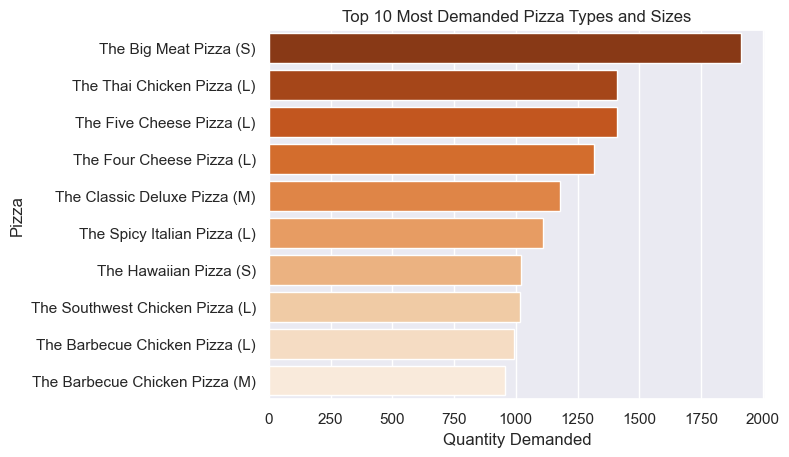

In [36]:
fig,ax = plt.subplots()
sns.barplot(x= 'Demand',
            y= 'pizza',
            data = most_demanded_pizza.head(10),
            palette ='Oranges_r')
ax.set_xlabel('Quantity Demanded')
ax.set_ylabel('Pizza')
ax.set_title('Top 10 Most Demanded Pizza Types and Sizes')
plt.show()

In [37]:
df.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category,session
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25,Weekday,Morning
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00,Weekday,Morning
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50,Weekday,Morning
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75,Weekday,Morning
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00,Weekday,Morning


In [38]:
df['pizza'] = df['name'] + ' (' + df['size'] +')'

##### Which pizza type drives the most sale

In [39]:
df[['pizza_id','sales']]

,pizza_id,sales
0,hawaiian_m,13.25
1,classic_dlx_m,16.00
2,five_cheese_l,18.50
3,ital_supr_l,20.75
4,mexicana_m,16.00
...,...,...
48615,ckn_alfredo_m,16.75
48616,four_cheese_l,17.95
48617,napolitana_s,12.00
48618,mexicana_l,20.25


In [40]:
Sales_by_pizza =df.groupby(['pizza'])['sales'].sum().reset_index(name='Revenue').sort_values(by='Revenue',ascending=False)
Sales_by_pizza

,pizza,Revenue
85,The Thai Chicken Pizza (L),29257.50
20,The Five Cheese Pizza (L),26066.50
21,The Four Cheese Pizza (L),23622.20
73,The Spicy Italian Pizza (L),23011.75
3,The Big Meat Pizza (S),22968.00
...,...,...
48,The Mexicana Pizza (S),1944.00
28,The Green Garden Pizza (L),1923.75
13,The Chicken Alfredo Pizza (S),1224.00
7,The Calabrese Pizza (S),1212.75


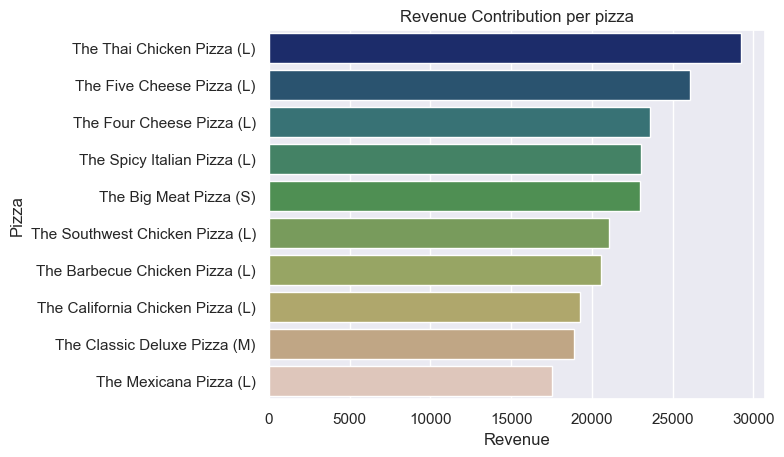

In [41]:
Sales_by_pizza = Sales_by_pizza.head(10)
fig,ax = plt.subplots()
sns.barplot(x= 'Revenue',
            y= 'pizza',
            data = Sales_by_pizza,
            palette ='gist_earth')
ax.set_xlabel('Revenue')
ax.set_ylabel('Pizza')
ax.set_title('Revenue Contribution per pizza')
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_id          48620 non-null  object        
 1   pizza_type_id     48620 non-null  object        
 2   size              48620 non-null  object        
 3   price             48620 non-null  float64       
 4   name              48620 non-null  object        
 5   category          48620 non-null  object        
 6   ingredients       48620 non-null  object        
 7   order_id          48620 non-null  int64         
 8   date              48620 non-null  object        
 9   time              48620 non-null  object        
 10  datetime          48620 non-null  datetime64[ns]
 11  month             48620 non-null  object        
 12  Day               48620 non-null  object        
 13  hour              48620 non-null  int64         
 14  order_details_id  4862

##### Which pizza category are bring more sales?

In [43]:
total_orders_by_category=df['category'].value_counts()
total_orders_by_category

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: category, dtype: int64

In [44]:
total_revenue_by_category= df.groupby('category')['sales'].sum().sort_values(ascending=False).reset_index()
total_revenue_by_category

,category,sales
0,Classic,220053.10
1,Supreme,208197.00
2,Chicken,195919.50
3,Veggie,193690.45


##### Which pizza size bring more sales?

In [45]:
total_revenue_by_size= df.groupby('size')['sales'].sum().sort_values(ascending=False).reset_index()
total_revenue_by_size

,size,sales
0,L,375318.70
1,M,249382.25
2,S,178076.50
3,XL,14076.00
4,XXL,1006.60


### Pricing and Sales Analysis

##### What are the price range within the menu?

In [46]:
#most expensive pizza
df[['pizza_id','price']].sort_values(by ='price',ascending=False).head(10)

,pizza_id,price
22903,the_greek_xxl,35.95
13779,the_greek_xxl,35.95
5901,the_greek_xxl,35.95
14029,the_greek_xxl,35.95
41182,the_greek_xxl,35.95
47489,the_greek_xxl,35.95
42717,the_greek_xxl,35.95
6365,the_greek_xxl,35.95
15330,the_greek_xxl,35.95
3447,the_greek_xxl,35.95


 Pizza variation Pricing 
 
- Each pizza type may have multiple size-based price points (e.g., Small, Medium, Large, Extra Large).
- Using .max() on price grouped by Pizza Variant Pricing and this is because each pizza type have multiple size-based price points (e.g., Small, Medium, Large,Extra Large).
- Using .max() on price grouped by pizza_id and name identifies the most expensive variant of each pizza.
- This shows the highest-priced size configuration, not the average pricing of the pizza type.

Pizza Type Pricing (.mean)
 
- Using .mean() on price grouped by pizza type estimates the average price level of that pizza type across all sizes.This provides a more balanced view of pricing rather than focusing only on variant sizes
- This reflects the highest-priced size configuration, not the average pricing of the pizza type.It will sum up the price for each type category and gets the average for that category regardless of the size


In [47]:
#What is the single most expensive pizza variant available?
top_10_expensive_variant = df.groupby(['pizza'])['price'].max().sort_values(ascending=False).reset_index().head(10)
top_10_expensive_variant  


,pizza,price
0,The Greek Pizza (XXL),35.95
1,The Greek Pizza (XL),25.50
2,The Brie Carre Pizza (S),23.65
3,The Italian Vegetables Pizza (L),21.00
4,The Prosciutto and Arugula Pizza (L),20.75
5,The Spicy Italian Pizza (L),20.75
6,The Pepper Salami Pizza (L),20.75
7,The California Chicken Pizza (L),20.75
8,The Spinach Supreme Pizza (L),20.75
9,The Chicken Alfredo Pizza (L),20.75


In [48]:
#What is the single cheapest expensive pizza variant available?
top_10_cheap_variant=df.groupby(['pizza'])['price'].min().sort_values(ascending=True).reset_index().head(10)
top_10_cheap_variant  

,pizza,price
0,The Pepperoni Pizza (S),9.75
1,The Hawaiian Pizza (S),10.50
2,"The Pepperoni, Mushroom, and Peppers Pizza (S)",11.00
3,The Mediterranean Pizza (S),12.00
4,The Spinach and Feta Pizza (S),12.00
5,The Napolitana Pizza (S),12.00
6,The Mexicana Pizza (S),12.00
7,The Italian Capocollo Pizza (S),12.00
8,The Green Garden Pizza (S),12.00
9,The Greek Pizza (S),12.00


In [49]:
#Which overall pizza type is the cheapest?
top_10_cheap_type = df.groupby(['pizza_type_id','name'])['price'].mean().sort_values(ascending=True).reset_index().head(10)
top_10_cheap_type  

,pizza_type_id,name,price
0,big_meat,The Big Meat Pizza,12.000000
1,pepperoni,The Pepperoni Pizza,12.468658
2,hawaiian,The Hawaiian Pizza,13.317194
3,pep_msh_pep,"The Pepperoni, Mushroom, and Peppers Pizza",13.865127
4,green_garden,The Green Garden Pizza,14.001520
5,classic_dlx,The Classic Deluxe Pizza,15.575952
6,sicilian,The Sicilian Pizza,15.963831
7,veggie_veg,The Vegetables + Vegetables Pizza,15.979967
8,spinach_fet,The Spinach and Feta Pizza,16.076292
9,spin_pesto,The Spinach Pesto Pizza,16.079676


In [50]:
#Which overall pizza type is the mostexpensive?
top_10_expensive_type = df.groupby(['pizza_type_id','name'])['price'].mean().sort_values(ascending=False).reset_index().head(10)
top_10_expensive_type  

,pizza_type_id,name,price
0,brie_carre,The Brie Carre Pizza,23.650000
1,the_greek,The Greek Pizza,20.035633
2,five_cheese,The Five Cheese Pizza,18.500000
3,thai_ckn,The Thai Chicken Pizza,18.286069
4,spicy_ital,The Spicy Italian Pizza,18.104663
5,southw_ckn,The Southwest Chicken Pizza,18.080504
6,mexicana,The Mexicana Pizza,18.024038
7,ital_supr,The Italian Supreme Pizza,17.769740
8,peppr_salami,The Pepper Salami Pizza,17.637834
9,bbq_ckn,The Barbecue Chicken Pizza,17.572934


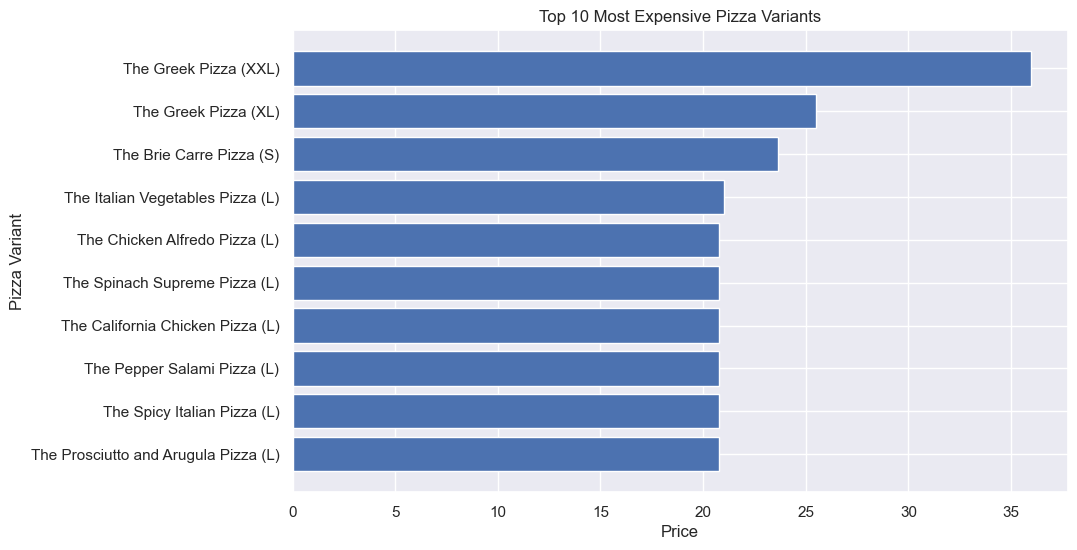

In [51]:
top_10_expensive_variant =top_10_expensive_variant.sort_values('price')

fig, ax = plt.subplots(figsize=(10, 6))

plt.barh(top_10_expensive_variant['pizza'], top_10_expensive_variant['price'])

ax.set_xlabel('Price')
ax.set_ylabel('Pizza Variant')
ax.set_title('Top 10 Most Expensive Pizza Variants')

plt.show()

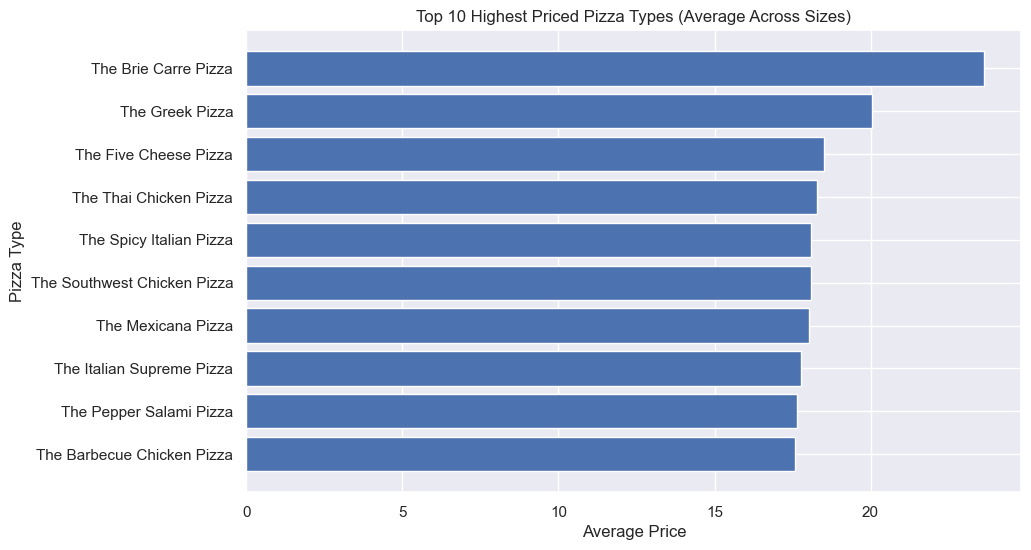

In [52]:
top_10_expensive_type = top_10_expensive_type.sort_values('price')

fig, ax = plt.subplots(figsize=(10, 6))

plt.barh(top_10_expensive_type['name'], top_10_expensive_type['price'])

ax.set_xlabel('Average Price')
ax.set_ylabel('Pizza Type')
ax.set_title('Top 10 Highest Priced Pizza Types (Average Across Sizes)')
plt.show()

##### Is there a relationship between price and quantity sold?

In [53]:
corr=df[['price','quantity']].corr()
corr


,price,quantity
price,1.000000,0.007142
quantity,0.007142,1.000000


<AxesSubplot:>

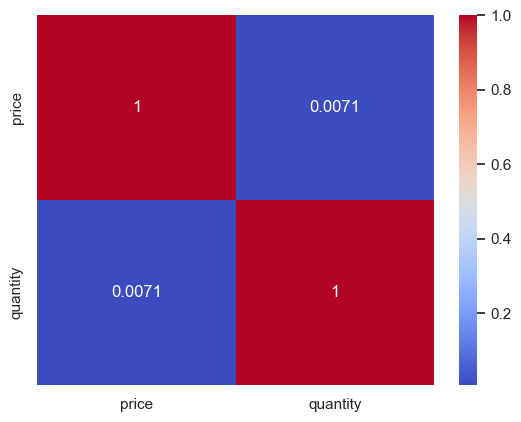

In [54]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [55]:
price_to_quantity = (df.groupby('pizza').agg({'price': 'mean', 'quantity': 'sum'}).reset_index())
price_to_quantity

,pizza,price,quantity
0,The Barbecue Chicken Pizza (L),20.75,992
1,The Barbecue Chicken Pizza (M),16.75,956
2,The Barbecue Chicken Pizza (S),12.75,484
3,The Big Meat Pizza (S),12.00,1914
4,The Brie Carre Pizza (S),23.65,490
...,...,...,...
86,The Thai Chicken Pizza (M),16.75,481
87,The Thai Chicken Pizza (S),12.75,480
88,The Vegetables + Vegetables Pizza (L),20.25,427
89,The Vegetables + Vegetables Pizza (M),16.00,635


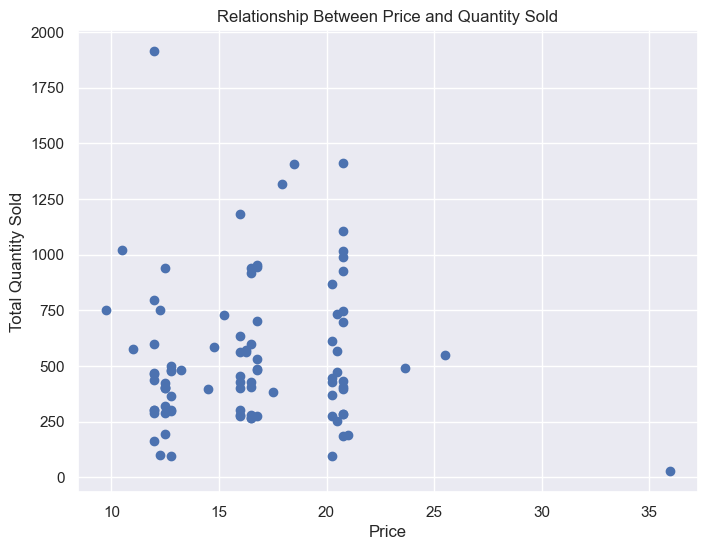

In [56]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.scatter(price_to_quantity['price'], price_to_quantity['quantity'])

ax.set_xlabel('Price')
ax.set_ylabel('Total Quantity Sold')
ax.set_title('Relationship Between Price and Quantity Sold')


plt.show()


- This shows that demand does not depend majorly on price
- Sales concentration exists within specific price range
- Some affordable pizzas dominate volume

There is no clear pattern showing that higher prices consistently lead to lower sales.This reveals that
  - The most demanded pizzas e.g. Big meat pizza(s), are not always the cheapest they are often in between price.
  - Some medium priced pizzas e.g. Thai Chicken(L) recorded the highest sales volumes,and this proves that customer preference plays a bigger role than price alone.
  - Menu pricing appears in levels: Many pizzas share similar price levels, which shows a structured pricing not a wide variation price
  - Some pizzas show very low sales regardless of price, which may indicate that it is not preferred maybe due to taste and other factors or poor branding/marketing

to understand the visualiazation better, let's check the correlation

In [57]:
price_to_quantity['price'].corr(price_to_quantity['quantity'])


-0.0033691797835728593

In [58]:
df

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category,session,pizza
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25,Weekday,Morning,The Hawaiian Pizza (M)
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00,Weekday,Morning,The Classic Deluxe Pizza (M)
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50,Weekday,Morning,The Five Cheese Pizza (L)
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75,Weekday,Morning,The Italian Supreme Pizza (L)
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00,Weekday,Morning,The Mexicana Pizza (M)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,ckn_alfredo_m,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",21348,2015-12-31,21:23:10,2015-12-31 21:23:10,December,Thursday,21,48616,1,16.75,Weekday,Night,The Chicken Alfredo Pizza (M)
48616,four_cheese_l,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",21348,2015-12-31,21:23:10,2015-12-31 21:23:10,December,Thursday,21,48617,1,17.95,Weekday,Night,The Four Cheese Pizza (L)
48617,napolitana_s,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",21348,2015-12-31,21:23:10,2015-12-31 21:23:10,December,Thursday,21,48618,1,12.00,Weekday,Night,The Napolitana Pizza (S)
48618,mexicana_l,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",21349,2015-12-31,22:09:54,2015-12-31 22:09:54,December,Thursday,22,48619,1,20.25,Weekday,Night,The Mexicana Pizza (L)


##### Total Quantity and Sales

In [59]:
Total_quantity = df['quantity'].sum()
print('Total Quantity Sold in 2015: $',Total_quantity)

Total Quantity Sold in 2015: $ 49574


In [60]:
Total_sales = df['sales'].sum()
print('Total Sales in 2015: $',Total_sales)

Total Sales in 2015: $ 817860.05


There is therfore a negative correlation between price and quantity

### Time Series

##### Which day of the week recorded the highest sale volume?

In [61]:
df.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category,session,pizza
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25,Weekday,Morning,The Hawaiian Pizza (M)
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00,Weekday,Morning,The Classic Deluxe Pizza (M)
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50,Weekday,Morning,The Five Cheese Pizza (L)
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75,Weekday,Morning,The Italian Supreme Pizza (L)
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00,Weekday,Morning,The Mexicana Pizza (M)


In [62]:
No_sales_by_day =df.groupby('Day')['quantity'].count()

In [63]:
No_sales_by_day = No_sales_by_day.reset_index(name='total_pizzas_sold')
No_sales_by_day 

,Day,total_pizzas_sold
0,Friday,8106
1,Monday,6369
2,Saturday,7355
3,Sunday,5917
4,Thursday,7323
5,Tuesday,6753
6,Wednesday,6797


In [64]:
# Sort the days according to order
day_order = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']

No_sales_by_day['Day'] = pd.Categorical(No_sales_by_day['Day'],categories=day_order,ordered=True)

No_sales_by_day = No_sales_by_day.sort_values('Day')


In [65]:
No_sales_by_day

,Day,total_pizzas_sold
1,Monday,6369
5,Tuesday,6753
6,Wednesday,6797
4,Thursday,7323
0,Friday,8106
2,Saturday,7355
3,Sunday,5917


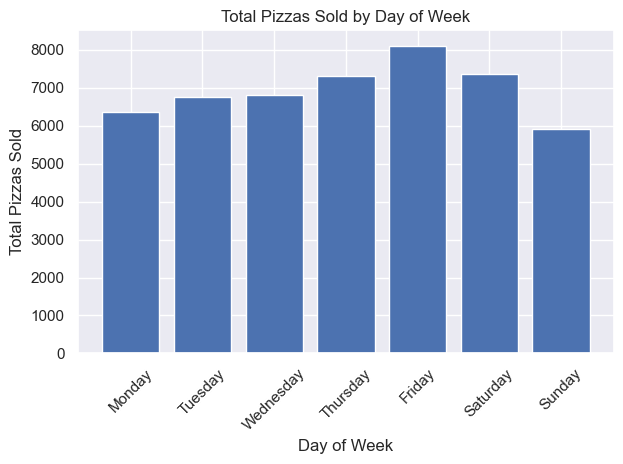

In [66]:
fig, ax = plt.subplots()

plt.bar(No_sales_by_day['Day'], No_sales_by_day['total_pizzas_sold'])

ax.set_xlabel('Day of Week')
ax.set_ylabel('Total Pizzas Sold')
ax.set_title('Total Pizzas Sold by Day of Week')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Which day recorded highest revenue?

In [67]:
total_revenue_by_day =df.groupby('Day')['sales'].sum().sort_values(ascending=False).reset_index()
total_revenue_by_day

,Day,sales
0,Friday,136073.90
1,Thursday,123528.50
2,Saturday,123182.40
3,Wednesday,114408.40
4,Tuesday,114133.80
5,Monday,107329.55
6,Sunday,99203.50


In [68]:
avg_daily_sale =df.groupby('Day')['sales'].mean().sort_values(ascending=False).reset_index()
avg_daily_sale.round(2)

,Day,sales
0,Tuesday,16.90
1,Thursday,16.87
2,Monday,16.85
3,Wednesday,16.83
4,Friday,16.79
5,Sunday,16.77
6,Saturday,16.75


Fridays are the busiest sales day overall, that is there is high traffic of customers, while on Tuesdays, customers spend more per purchase.That is Tuesday customers spend more on our pizza”



##### What does the distribution of daily sales look like?

In [69]:
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   pizza_id          48620 non-null  object        
 1   pizza_type_id     48620 non-null  object        
 2   size              48620 non-null  object        
 3   price             48620 non-null  float64       
 4   name              48620 non-null  object        
 5   category          48620 non-null  object        
 6   ingredients       48620 non-null  object        
 7   order_id          48620 non-null  int64         
 8   date              48620 non-null  datetime64[ns]
 9   time              48620 non-null  object        
 10  datetime          48620 non-null  datetime64[ns]
 11  month             48620 non-null  object        
 12  Day               48620 non-null  object        
 13  hour              48620 non-null  int64         
 14  order_details_id  4862

In [70]:
daily_sales = df.groupby('date')['quantity'].sum().reset_index()
daily_sales

,date,quantity
0,2015-01-01,162
1,2015-01-02,165
2,2015-01-03,158
3,2015-01-04,106
4,2015-01-05,125
...,...,...
353,2015-12-27,89
354,2015-12-28,102
355,2015-12-29,80
356,2015-12-30,82


##### Average Order frequency

In [95]:
orders_per_day = df.groupby('date')['order_id'].nunique()

orders_per_day

date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
              ..
2015-12-27    35
2015-12-28    39
2015-12-29    27
2015-12-30    32
2015-12-31    73
Name: order_id, Length: 358, dtype: int64

In [96]:
average_order_frequency = orders_per_day.mean()

average_order_frequency

59.63687150837989

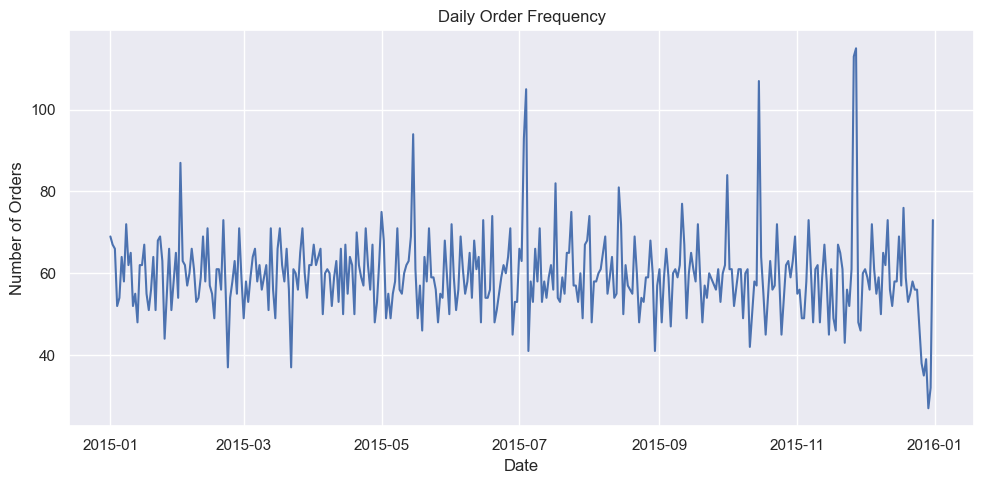

In [104]:
fig, ax = plt.subplots(figsize=(10,5))

sns.lineplot(x = orders_per_day.index, y = orders_per_day.values, ax=ax)

ax.set_title('Daily Order Frequency')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')

plt.tight_layout()
plt.savefig('screenshot.png')
plt.show()

The average order is 59.64 orders per day .We see a large increase in the number of orders around the festive period which make sense,and a significant decline toward the end of the year

##### What are the peak sales periods during the day?

In [73]:
df.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category,session,pizza
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25,Weekday,Morning,The Hawaiian Pizza (M)
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00,Weekday,Morning,The Classic Deluxe Pizza (M)
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50,Weekday,Morning,The Five Cheese Pizza (L)
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75,Weekday,Morning,The Italian Supreme Pizza (L)
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00,Weekday,Morning,The Mexicana Pizza (M)


Peak period = period with highest revenue or highest quantity sold

In [74]:
peak_hour_volume = df.groupby('hour')['quantity'].sum().reset_index()

peak_hour_volume




,hour,quantity
0,9,4
1,10,18
2,11,2728
3,12,6776
4,13,6413
5,14,3613
6,15,3216
7,16,4239
8,17,5211
9,18,5417


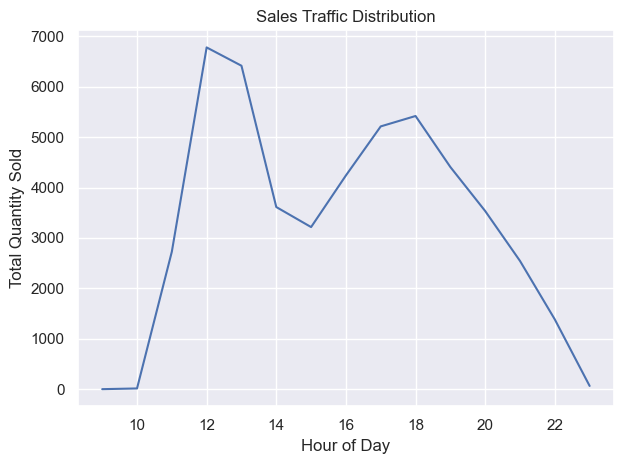

In [75]:
fig, ax = plt.subplots()
ax.plot(peak_hour_volume['hour'], peak_hour_volume['quantity'])

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Total Quantity Sold')
ax.set_title('Sales Traffic Distribution')

plt.tight_layout()
plt.show()

In [76]:
peak_hour_sales = df.groupby('hour')['sales'].sum().reset_index()

peak_hour_sales


,hour,sales
0,9,83.00
1,10,303.65
2,11,44935.80
3,12,111877.90
4,13,106065.70
5,14,59201.40
6,15,52992.30
7,16,70055.40
8,17,86237.45
9,18,89296.85


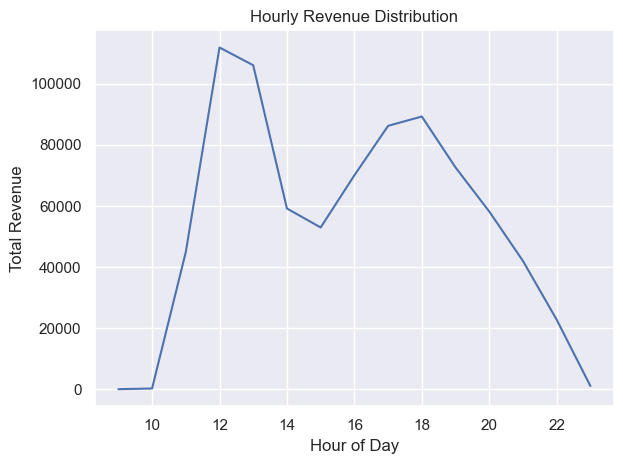

In [77]:
fig, ax = plt.subplots()
ax.plot(peak_hour_sales['hour'], peak_hour_sales['sales'])

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Total Revenue')
ax.set_title('Hourly Revenue Distribution')

plt.tight_layout()
plt.show()

In [78]:
peak_session = df.groupby('session')['quantity'].sum().sort_values(ascending=True).reset_index()
peak_session

,session,quantity
0,Morning,2750
1,Night,7533
2,Evening,19273
3,Afternoon,20018


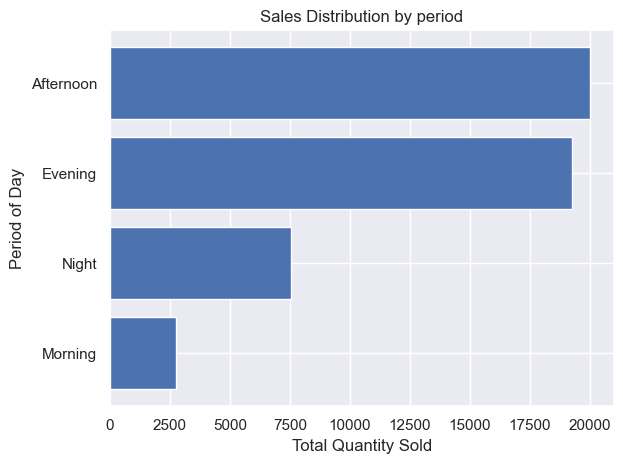

In [79]:
fig, ax = plt.subplots()
ax.barh(peak_session['session'], peak_session['quantity'])

ax.set_xlabel('Total Quantity Sold')
ax.set_ylabel('Period of Day')
ax.set_title('Sales Distribution by period')

plt.tight_layout()
plt.show()

The peak hours between lunch and dinner show the highest transaction volume, and since peak hour volume = peak hour sales, it indicates revenue is primarily driven by customer traffic rather than variation in average order value per day.

##### How are sales different between weekdays and weekend ?

In [80]:
day_variation = df.groupby('day_category')['sales'].agg(['sum', 'mean']).reset_index()
day_variation.columns = ['day_category', 'Total_Sales', 'Average_Sales']
day_variation

,day_category,Total_Sales,Average_Sales
0,Weekday,595474.15,16.846049
1,Weekend,222385.90,16.756020


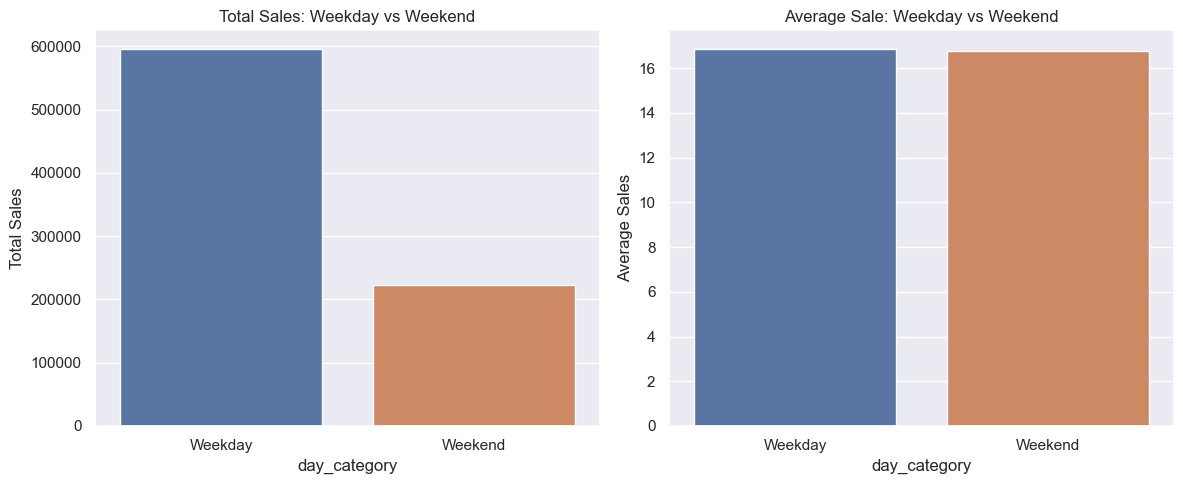

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Total Sales Plot
sns.barplot(data=day_variation, x='day_category', y='Total_Sales', ax=axs[0])
axs[0].set_title('Total Sales: Weekday vs Weekend')
axs[0].set_ylabel('Total Sales')

# Average Sales Plot
sns.barplot(data=day_variation, x='day_category', y='Average_Sales', ax=axs[1])
axs[1].set_title('Average Sale: Weekday vs Weekend')
axs[1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()


Weekdays bring more traffic and total revenue, but weekends bring customers who spend more per visit. 

##### How do Sales vary Monthly

In [82]:
goods_per_month=df.groupby('month')['quantity'].sum().sort_values(ascending=False).reset_index()
goods_per_month

,month,quantity
0,July,4392
1,May,4328
2,November,4266
3,March,4261
4,January,4232
5,August,4168
6,April,4151
7,June,4107
8,February,3961
9,December,3935


In [83]:
sales_per_month=df.groupby('month')['sales'].sum().reset_index()
sales_per_month

,month,sales
0,April,68736.80
1,August,68278.25
2,December,64701.15
3,February,65159.60
4,January,69793.30
5,July,72557.90
6,June,68230.20
7,March,70397.10
8,May,71402.75
9,November,70395.35


In [84]:
month_order = ['January', 'February', 'March','April', 'May', 'June', 'July','August','September','October','November','December']

sales_per_month['month'] = pd.Categorical(sales_per_month['month'],categories=month_order,ordered=True)

sales_per_month = sales_per_month.sort_values('month')
sales_per_month

,month,sales
4,January,69793.30
3,February,65159.60
7,March,70397.10
0,April,68736.80
8,May,71402.75
6,June,68230.20
5,July,72557.90
1,August,68278.25
11,September,64180.05
10,October,64027.60


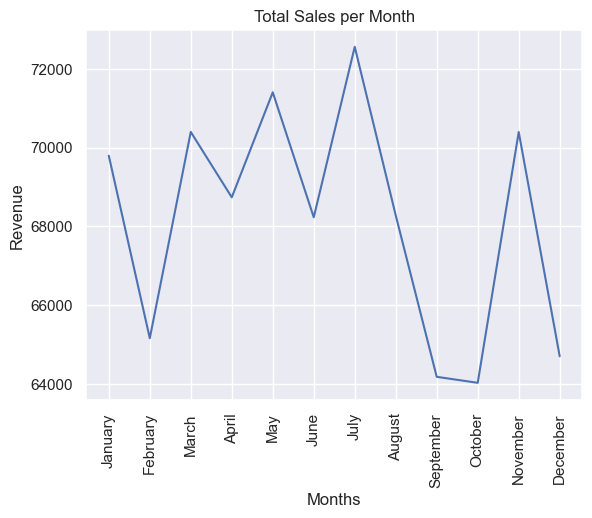

In [85]:
fig,ax = plt.subplots()
plt.plot(sales_per_month["month"],sales_per_month["sales"])
ax.set_xlabel("Months")
ax.set_ylabel("Revenue")
plt.xticks(rotation=90)
ax.set_title("Total Sales per Month")
plt.show()

July is our peak revenue month, maybe due to seasonality or holiday patterns, while October sees the lowest performance. Further investigation is needed to determine causes, but we can already strategize to maximize July’s peak and improve October’s performance through promotions and customer engagement.

### Customer Behaviour

##### Who are the most frequent customers and what are their preferences?

In [86]:
df

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category,session,pizza
0,hawaiian_m,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",1,2015-01-01,11:38:36,2015-01-01 11:38:36,January,Thursday,11,1,1,13.25,Weekday,Morning,The Hawaiian Pizza (M)
1,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,2,1,16.00,Weekday,Morning,The Classic Deluxe Pizza (M)
2,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,3,1,18.50,Weekday,Morning,The Five Cheese Pizza (L)
3,ital_supr_l,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,4,1,20.75,Weekday,Morning,The Italian Supreme Pizza (L)
4,mexicana_m,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2,2015-01-01,11:57:40,2015-01-01 11:57:40,January,Thursday,11,5,1,16.00,Weekday,Morning,The Mexicana Pizza (M)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,ckn_alfredo_m,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",21348,2015-12-31,21:23:10,2015-12-31 21:23:10,December,Thursday,21,48616,1,16.75,Weekday,Night,The Chicken Alfredo Pizza (M)
48616,four_cheese_l,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",21348,2015-12-31,21:23:10,2015-12-31 21:23:10,December,Thursday,21,48617,1,17.95,Weekday,Night,The Four Cheese Pizza (L)
48617,napolitana_s,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",21348,2015-12-31,21:23:10,2015-12-31 21:23:10,December,Thursday,21,48618,1,12.00,Weekday,Night,The Napolitana Pizza (S)
48618,mexicana_l,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",21349,2015-12-31,22:09:54,2015-12-31 22:09:54,December,Thursday,22,48619,1,20.25,Weekday,Night,The Mexicana Pizza (L)


In [87]:
freq_customer = df['order_id'].value_counts().reset_index().rename(columns={'index':'Customer_id','order_id':'Frequency'}).sort_values(by='Frequency',ascending=False).head(10)

In [88]:
freq_customer

,Customer_id,Frequency
0,18845,21
1,10760,21
5,20163,15
7,13906,15
6,14304,15
8,20710,15
4,17464,15
3,21158,15
2,18280,15
38,18165,14


Customer with order_id "18845" and "10760" are the most frequent customer

In [89]:
# which is their preference
most_freq_cus = (df['order_id'] == 18845)| (df['order_id'] == 10760)
most_freq_cus = df[most_freq_cus]
most_freq_cus

,pizza_id,pizza_type_id,size,price,name,category,ingredients,order_id,date,time,datetime,month,Day,hour,order_details_id,quantity,sales,day_category,session,pizza
24467,big_meat_s,big_meat,S,12.00,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24468,2,24.00,Weekday,Afternoon,The Big Meat Pizza (S)
24468,brie_carre_s,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24469,1,23.65,Weekday,Afternoon,The Brie Carre Pizza (S)
24469,cali_ckn_l,cali_ckn,L,20.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24470,2,41.50,Weekday,Afternoon,The California Chicken Pizza (L)
24470,ckn_alfredo_m,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24471,1,16.75,Weekday,Afternoon,The Chicken Alfredo Pizza (M)
24471,classic_dlx_m,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24472,2,32.00,Weekday,Afternoon,The Classic Deluxe Pizza (M)
24472,five_cheese_l,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24473,2,37.00,Weekday,Afternoon,The Five Cheese Pizza (L)
24473,hawaiian_l,hawaiian,L,16.50,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24474,1,16.50,Weekday,Afternoon,The Hawaiian Pizza (L)
24474,ital_cpcllo_l,ital_cpcllo,L,20.50,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24475,1,20.50,Weekday,Afternoon,The Italian Capocollo Pizza (L)
24475,ital_veggie_m,ital_veggie,M,16.75,The Italian Vegetables Pizza,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24476,1,16.75,Weekday,Afternoon,The Italian Vegetables Pizza (M)
24476,ital_veggie_s,ital_veggie,S,12.75,The Italian Vegetables Pizza,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",10760,2015-06-30,13:31:27,2015-06-30 13:31:27,June,Tuesday,13,24477,1,12.75,Weekday,Afternoon,The Italian Vegetables Pizza (S)


In [90]:
most_freq_grouped = most_freq_cus.groupby(['order_id','pizza','pizza_id'])['quantity'].sum().reset_index()
most_freq_grouped


,order_id,pizza,pizza_id,quantity
0,10760,The Big Meat Pizza (S),big_meat_s,2
1,10760,The Brie Carre Pizza (S),brie_carre_s,1
2,10760,The California Chicken Pizza (L),cali_ckn_l,2
3,10760,The Chicken Alfredo Pizza (M),ckn_alfredo_m,1
4,10760,The Classic Deluxe Pizza (M),classic_dlx_m,2
5,10760,The Five Cheese Pizza (L),five_cheese_l,2
6,10760,The Hawaiian Pizza (L),hawaiian_l,1
7,10760,The Italian Capocollo Pizza (L),ital_cpcllo_l,1
8,10760,The Italian Vegetables Pizza (M),ital_veggie_m,1
9,10760,The Italian Vegetables Pizza (S),ital_veggie_s,1


In [91]:
preference = most_freq_grouped.pivot_table(index='pizza_id', columns='order_id', values='quantity',fill_value=0)
preference

order_id,10760,18845
pizza_id,,
bbq_ckn_m,0,3
big_meat_s,2,2
brie_carre_s,1,0
calabrese_m,0,1
cali_ckn_l,2,0
ckn_alfredo_m,1,1
ckn_pesto_s,0,1
classic_dlx_m,2,1
classic_dlx_s,0,1


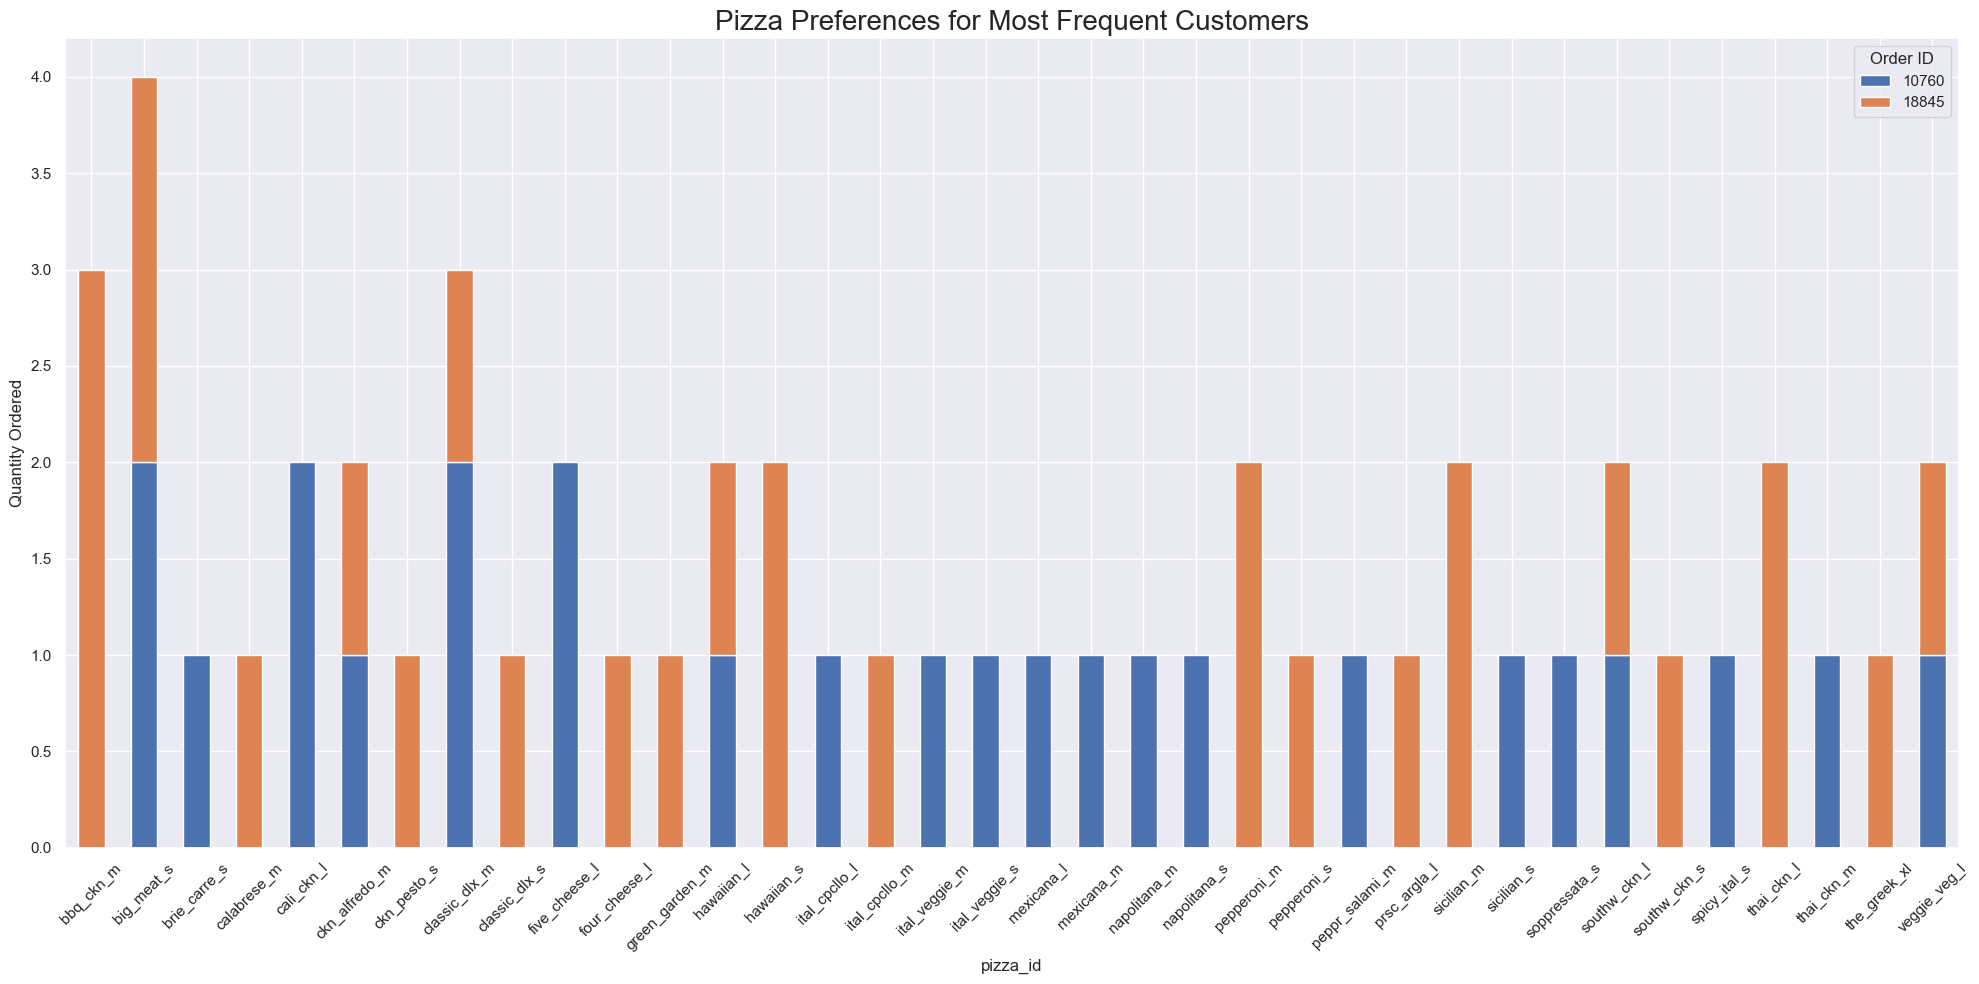

In [92]:
fig, ax = plt.subplots(figsize=(20,10))

preference.plot(kind='bar',stacked=True, ax=ax)

ax.set_ylabel('Quantity Ordered')
ax.set_title('Pizza Preferences for Most Frequent Customers',fontsize=20)
ax.legend(title='Order ID')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


This reveals that while Fridays bring the highest traffic, these frequent customers show loyalty regardless of day,with cosistent order of their favourite(The Barbecue Chicken Pizza (M) and the Big Meat (S). By doing promotions and ensuring availability of these high-demand items, we can strengthen customer retention and increase average order value.

##### Average orders per customer

In [102]:
Avg_order_freq = df.groupby('order_id')['quantity'].sum().sort_values(ascending=False).reset_index()
Avg_order_freq['quantity'].mean()

2.321967213114754